# Halpha Emitters S-PLUS

In [30]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
from itertools import combinations
import umap
import seaborn as sns; sns.set()
sns.set_theme(style="ticks")

In [31]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.read_csv("../IGAPs-emitters-wise.csv")
combined_df

Name     RAJ2000    DEJ2000       GLON      GLAT  \
0     J194407.42+302330.8  296.030917  30.391885  65.664704  3.196313   
1     J194658.92+300856.6  296.745494  30.149063  65.762646  2.540368   
2     J194853.02+304415.1  297.220898  30.737534  66.478141  2.482665   
3     J193737.05+291841.3  294.404389  29.311475  64.027520  3.894285   
4     J193422.27+291439.8  293.592782  29.244383  63.625692  4.481705   
...                   ...         ...        ...        ...       ...   
9809  J194657.47+291706.8  296.739465  29.285215  65.012424  2.111001   
9810  J194631.32+291451.9  296.630484  29.247751  64.932234  2.174407   
9811  J194725.96+293304.7  296.858158  29.551299  65.294604  2.155432   
9812  J194912.66+294740.1  297.302738  29.794486  65.699773  1.944719   
9813  J194412.15+295844.7  296.050606  29.979087  65.314427  2.976419   

             SourceID   ePos  Class  pStar  pGalaxy  ...   ccf  ex   var  \
0     470950-3-22952   0.033   -1.0   1.00     0.00  ...  0000   0  32nn   
1     398901-1-7845    0.052    1.0   0.00     1.00  ...  hh00   1  63nn   
2     399404-3-13395   0.065   99.0   0.05     0.94  ...  0h00   1  21nn   
3     420815-3-7132    0.044   -1.0   1.00     0.00  ...  dd00   0  nnnn   
4     420083-3-17125   0.043   99.0   0.00     1.00  ...  dd00   0  nnnn   
...               ...    ...    ...    ...      ...  ...   ...  ..   ...   
9809  626263-3-22491   0.026   -1.0   1.00     0.00  ...  00dD   1  31nn   
9810  364539-1-2795    0.031   -1.0   1.00     0.00  ...  0h00   0  000n   
9811  398934-4-24535   0.038   -1.0   1.00     0.00  ...  0hHH   0  31nn   
9812  534182-1-4440    0.018   -1.0   1.00     0.00  ...  0000   1  00nn   
9813  470950-1-22327   0.025   -1.0   1.00     0.00  ...  dd00   1  63nn   

       qph   pmRA  e_pmRA   pmDE  e_pmDE    d2M   angDist  
0     AACU  -83.0   104.0 -153.0   110.0  0.071  0.196844  
1     AABU  -82.0    68.0   -5.0    68.0  0.372  1.194323  
2     AAUU -231.0    55.0 -180.0    55.0  0.788  1.062905  
3     AAUU    NaN     NaN    NaN     NaN  0.303  0.296750  
4     AAUU    NaN     NaN    NaN     NaN  0.367  0.259146  
...    ...    ...     ...    ...     ...    ...       ...  
9809  AABB -192.0   138.0  -15.0   114.0  0.691  0.675858  
9810  AAAC -358.0    70.0  101.0    71.0  0.052  0.108804  
9811  AAUU   68.0   111.0   87.0   114.0  0.132  0.078484  
9812  AABC    8.0    60.0  -83.0    58.0  0.323  0.274081  
9813  AABU  246.0   190.0 -962.0   202.0  0.748  0.836127  

[9814 rows x 205 columns]

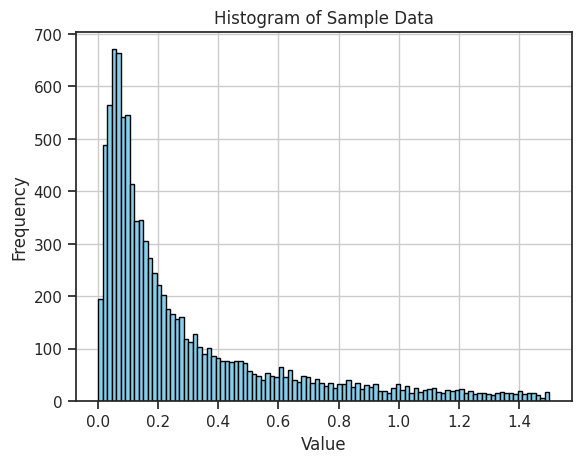

In [32]:
# See the distance of the SPLUS nad WISE source
# Plotting the histogram
plt.hist(combined_df["angDist"], bins=100, color='skyblue', edgecolor='black')  # You can adjust the number of bins as needed
plt.title('Histogram of Sample Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Add grid lines for better readability
plt.show()



In [33]:
for columns in combined_df.columns:
    print(columns)

Name
RAJ2000
DEJ2000
GLON
GLAT
SourceID
ePos
Class
pStar
pGalaxy
pNoise
imag
e_imag
imagAB
Elli
Classi
Deblendi
Saturatedi
Vignettedi
Traili
Truncatedi
BadPixi
MJDi
Seeingi
DetIDi
offRAi
offDEi
Hamag
e_Hamag
HamagAB
EllHa
ClassHa
DeblendHa
SaturatedHa
VignettedHa
TrailHa
TruncatedHa
BadPixHa
MJDHa
SeeingHa
DetIDHa
offRAHa
offDEHa
rImag
e_rImag
rImagAB
EllrI
ClassrI
DeblendrI
SaturatedrI
VignettedrI
TrailrI
TruncatedrI
BadPixrI
MJDrI
SeeingrI
DetIDrI
rUmag
e_rUmag
rUmagAB
EllrU
ClassrU
DeblendrU
SaturatedrU
VignettedrU
TrailrU
TruncatedrU
BadPixrU
MJDrU
SeeingrU
DetIDrU
offRArU
offDErU
gmag
e_gmag
gmagAB
Ellg
Classg
Deblendg
Saturatedg
Vignettedg
Trailg
Truncatedg
BadPixg
maskg
MJDg
Seeingg
DetIDg
offRAg
offDEg
Umag
e_Umag
EllU
ClassU
DeblendU
SaturatedU
VignettedU
TrailU
TruncatedU
BadPixU
MJDU
SeeingU
DetIDU
offRAU
offDEU
brightN
deblend
saturated
nBands
errBits
nObsI
nObsU
FieldIDI
FieldIDU
FieldGradeI
FieldGradeU
emitter
variable
SourceID2
imag2
e_imag2
Classi2
Seeingi2
MJDi2
offRAi

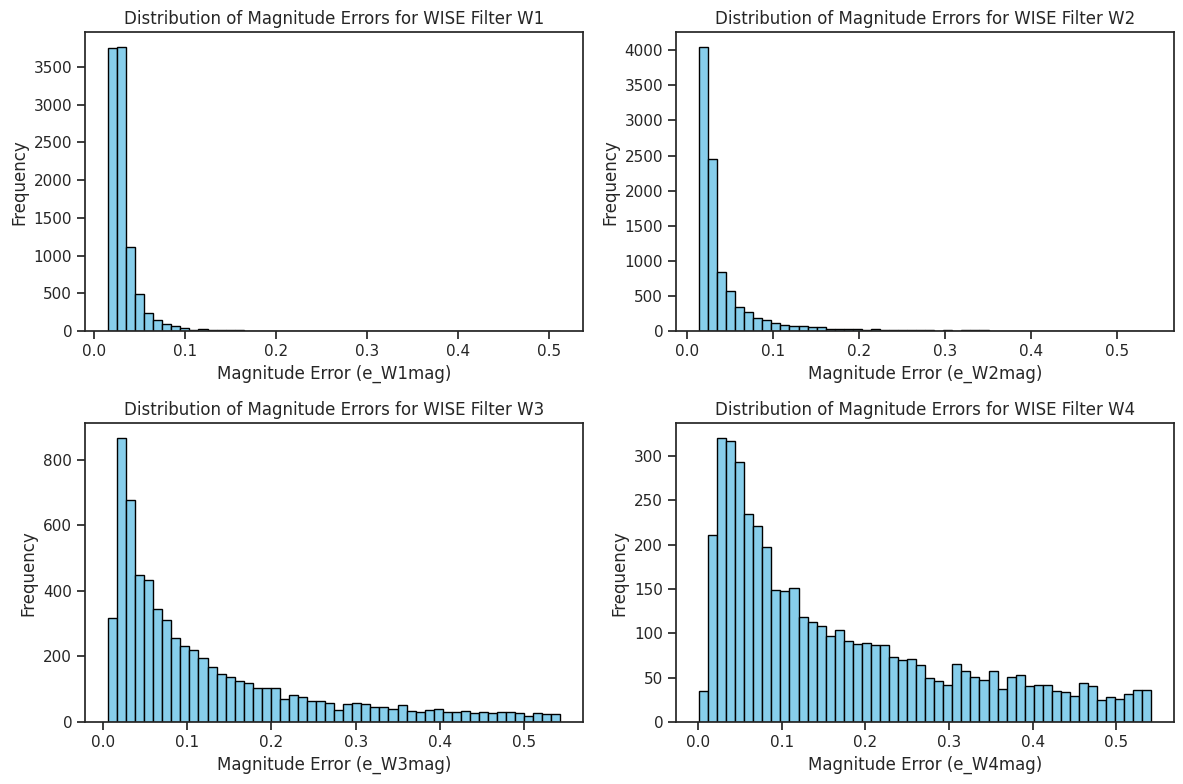

In [34]:
# Extract magnitude errors for WISE filters W1, W2, W3, W4
magnitude_errors_w1 = combined_df["e_W1mag"]
magnitude_errors_w2 = combined_df["e_W2mag"]
magnitude_errors_w3 = combined_df["e_W3mag"]
magnitude_errors_w4 = combined_df["e_W4mag"]

# Create subplots for each histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram for e_W1mag
axs[0, 0].hist(magnitude_errors_w1, bins=50, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribution of Magnitude Errors for WISE Filter W1')
axs[0, 0].set_xlabel('Magnitude Error (e_W1mag)')
axs[0, 0].set_ylabel('Frequency')

# Plot histogram for e_W2mag
axs[0, 1].hist(magnitude_errors_w2, bins=50, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Distribution of Magnitude Errors for WISE Filter W2')
axs[0, 1].set_xlabel('Magnitude Error (e_W2mag)')
axs[0, 1].set_ylabel('Frequency')

# Plot histogram for e_W3mag
axs[1, 0].hist(magnitude_errors_w3, bins=50, color='skyblue', edgecolor='black')
axs[1, 0].set_title('Distribution of Magnitude Errors for WISE Filter W3')
axs[1, 0].set_xlabel('Magnitude Error (e_W3mag)')
axs[1, 0].set_ylabel('Frequency')

# Plot histogram for e_W4mag
axs[1, 1].hist(magnitude_errors_w4, bins=50, color='skyblue', edgecolor='black')
axs[1, 1].set_title('Distribution of Magnitude Errors for WISE Filter W4')
axs[1, 1].set_xlabel('Magnitude Error (e_W4mag)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
# Máximos errores permitidos (ajustables según necesidades)
max_err_optical = 0.2  # Para bandas ópticas (g, r, i, Hα, U)
max_err_wise = 0.5      # Para WISE (W1, W2)
max_err_wise_W3W4 = 1.0  # Relajado para W3/W4
max_err_2mass = 0.2     # Para 2MASS (J, H, K)

# Máscara de errores para IGAPS (óptico)
m_err_igaps = (
    (combined_df["e_imag"] <= max_err_optical) &
    (combined_df["e_Hamag"] <= max_err_optical) &
    (combined_df["e_rImag"] <= max_err_optical) &
    (combined_df["e_rUmag"] <= max_err_optical) &
    (combined_df["e_gmag"] <= max_err_optical) &
    (combined_df["e_Umag"] <= max_err_optical)  # Opcional si se usa UV
)

# Filtrado de flags de calidad (ej. eliminar saturados)
m_quality_igaps = (
    (combined_df["Saturatedi"] == 0) &
    (combined_df["BadPixi"] == 0) &
    (combined_df["Traili"] == 0)  # Aplica a todas las bandas relevantes
)

In [36]:
# Máscara de errores para WISE y 2MASS
m_err_wise_tmass = (
    (combined_df["e_W1mag"] <= max_err_wise) &
    (combined_df["e_W2mag"] <= max_err_wise) &
    (combined_df["e_W3mag"] <= max_err_wise_W3W4) &
    (combined_df["e_W4mag"] <= max_err_wise_W3W4) &
    (combined_df["e_Jmag"] <= max_err_2mass) &
    (combined_df["e_Hmag"] <= max_err_2mass) &
    (combined_df["e_Kmag"] <= max_err_2mass)
)


In [37]:
# Combinar todas las máscaras
mask_total = (
    m_err_igaps &
    m_quality_igaps &
    m_err_wise_tmass 
)

# Aplicar la máscara al DataFrame
df_filtered = combined_df[mask_total].copy()
df_filtered

Name     RAJ2000    DEJ2000       GLON      GLAT  \
29    J194751.91+311818.2  296.966304  31.305043  66.858708  2.957180   
31    J195003.04+320607.2  297.512666  32.101992  67.782537  2.958194   
36    J195655.87+315637.0  299.232804  31.943608  68.395607  1.625256   
42    J200145.75+323013.5  300.440627  32.503743  69.408688  1.049061   
43    J200008.83+322535.0  300.036799  32.426377  69.163173  1.297699   
...                   ...         ...        ...        ...       ...   
9806  J193948.01+285751.9  294.950056  28.964425  63.957040  3.308919   
9808  J194716.33+284444.4  296.818036  28.745659  64.580360  1.780277   
9809  J194657.47+291706.8  296.739465  29.285215  65.012424  2.111001   
9810  J194631.32+291451.9  296.630484  29.247751  64.932234  2.174407   
9812  J194912.66+294740.1  297.302738  29.794486  65.699773  1.944719   

             SourceID   ePos  Class  pStar  pGalaxy  ...   ccf  ex   var  \
29    572370-1-13529   0.056   99.0   0.05     0.95  ...  0000   1  5411   
31    399482-2-6063    0.089   -1.0   1.00     0.00  ...  0000   0  990n   
36    406576-2-10667   0.079   99.0   0.95     0.05  ...  hh00   1  6530   
42    475219-2-7987    0.043   -1.0   1.00     0.00  ...  0d00   1  430n   
43    474809-4-10727   0.071   -1.0   1.00     0.00  ...  H000   0  n10n   
...               ...    ...    ...    ...      ...  ...   ...  ..   ...   
9806  571586-2-3412    0.030   -1.0   1.00     0.00  ...  hdd0   1  75nn   
9808  626263-1-15177   0.031   -1.0   1.00     0.00  ...  0h00   0  111n   
9809  626263-3-22491   0.026   -1.0   1.00     0.00  ...  00dD   1  31nn   
9810  364539-1-2795    0.031   -1.0   1.00     0.00  ...  0h00   0  000n   
9812  534182-1-4440    0.018   -1.0   1.00     0.00  ...  0000   1  00nn   

       qph   pmRA  e_pmRA   pmDE  e_pmDE    d2M   angDist  
29    AAAA    0.0    47.0    0.0    49.0  0.035  0.174561  
31    AAAB  -15.0    40.0 -221.0    40.0  0.198  0.087365  
36    AAAA -665.0    68.0  796.0   356.0  0.347  0.448454  
42    AAAC  248.0    51.0 -320.0    51.0  0.257  0.284214  
43    AAAB  -52.0    37.0  -19.0    39.0  0.066  0.074302  
...    ...    ...     ...    ...     ...    ...       ...  
9806  AABB -839.0   128.0 -602.0   119.0  0.340  0.473215  
9808  AAAC -153.0    40.0 -230.0    38.0  0.199  0.043361  
9809  AABB -192.0   138.0  -15.0   114.0  0.691  0.675858  
9810  AAAC -358.0    70.0  101.0    71.0  0.052  0.108804  
9812  AABC    8.0    60.0  -83.0    58.0  0.323  0.274081  

[2707 rows x 205 columns]

In [41]:
#Selecting columns
columns = ["rImag",       # Magnitud en banda r (IPHAS)
    "Hamag",       # Magnitud en Hα (filtro estrecho)
    "gmag",        # Magnitud en banda g
    "imag",        # Magnitud en banda i
    "rUmag",       # Magnitud en banda r (UVEX, para variabilidad)
    "Umag",
    "W1mag",       # WISE 3.4 µm
    "W2mag",       # WISE 4.6 µm
    "W3mag",       # WISE 3.4 µm
    "W4mag", 
    "Jmag",        # 2MASS J (1.25 µm)
    "Hmag",        # 2MASS H (1.65 µm)
    "Kmag"         # 2MASS Ks (2.17 µm)]
          ]

In [42]:
df_mag = df_filtered[columns]
df_mag

rImag  Hamag   gmag   imag  rUmag   Umag   W1mag   W2mag   W3mag  W4mag  \
29    16.10  14.46  17.18  15.80  16.16  17.25  12.756  12.350   7.706  3.775   
31    16.71  16.20  17.74  16.07  16.66  18.55  11.782  11.190   9.876  8.566   
36    16.45  15.06  18.16  15.40  16.39  19.44  10.849  10.301   6.964  5.310   
42    16.16  15.25  17.56  15.22  16.08  18.35  11.974  11.650  10.731  9.290   
43    14.90  14.12  16.63  13.85  14.93  17.76  10.465  10.146   9.302  8.364   
...     ...    ...    ...    ...    ...    ...     ...     ...     ...    ...   
9806  16.90  16.34  18.17  16.15  16.75  20.62  13.397  13.516  11.922  8.505   
9808  14.92  14.22  16.20  14.08  14.91  16.71  11.013  10.718   9.964  8.636   
9809  16.09  15.59  17.30  15.44  16.11  18.81  13.322  13.402  11.209  8.546   
9810  16.51  15.74  18.05  15.47  16.50  19.06  12.160  11.816  10.431  8.894   
9812  16.47  15.59  17.95  15.51  16.47  18.86  12.346  12.009  11.019  8.768   

        Jmag    Hmag    Kmag  
29    14.838  14.669  14.373  
31    14.570  13.612  12.863  
36    13.036  12.192  11.584  
42    13.604  13.027  12.582  
43    11.945  11.403  10.948  
...      ...     ...     ...  
9806  14.426  13.760  13.587  
9808  12.576  12.046  11.586  
9809  14.219  13.597  13.471  
9810  13.798  13.217  12.870  
9812  13.996  13.470  13.151  

[2707 rows x 13 columns]

In [43]:
# Creación de todos los colores no redundantes
df_colors = df_mag.assign(
    # --- Colores Óptico-Óptico (IGAPS) ---
    U_g = lambda x: x["Umag"] - x["gmag"],
    g_r = lambda x: x["gmag"] - x["rImag"],
    r_i = lambda x: x["rImag"] - x["imag"],
    r_Ha = lambda x: x["rImag"] - x["Hamag"],   # Exceso de Hα principal
    i_Ha = lambda x: x["imag"] - x["Hamag"],     # Alternativo para objetos rojos
    
    # --- Colores Óptico-IR (IGAPS + WISE/2MASS) ---
    g_W1 = lambda x: x["gmag"] - x["W1mag"],     # Exceso IR en objetos azules
    r_W2 = lambda x: x["rImag"] - x["W2mag"],    # Emisión óptica vs polvo térmico
    Ha_W1 = lambda x: x["Hamag"] - x["W1mag"],   # Hα vs polvo cálido
    Ha_W2 = lambda x: x["Hamag"] - x["W2mag"],   # Hα vs polvo más frío
    i_K = lambda x: x["imag"] - x["Kmag"],       # Óptico rojo vs IR cercano
    J_r = lambda x: x["Jmag"] - x["rImag"],      # IR vs óptico
    
    # --- Colores IR-IR (WISE + 2MASS) ---
    W1_W2 = lambda x: x["W1mag"] - x["W2mag"],   # Exceso térmico clave
    J_H = lambda x: x["Jmag"] - x["Hmag"],       # Indicador de tipo espectral
    H_K = lambda x: x["Hmag"] - x["Kmag"],       # Exceso en K (polvo/CO)
    W1_J = lambda x: x["W1mag"] - x["Jmag"],     # Polvo vs componente estelar
    # ============= NUEVOS COLORES CON W3/W4 =============
    # --- Polvo Térmico y Evolución de PNe ---
    W1_W3 = lambda x: x["W1mag"] - x["W3mag"],   # Polvo cálido (200–500 K)
    W2_W3 = lambda x: x["W2mag"] - x["W3mag"],   # Silicatos vs continuo
    W3_W4 = lambda x: x["W3mag"] - x["W4mag"],   # Polvo cálido vs frío (<100 K)
    
    # --- Diagnóstico de Emisión Nebular + Polvo ---
    Ha_W3 = lambda x: x["Hamag"] - x["W3mag"],  # Correlación Hα-W3 en PNe jóvenes
    r_W3 = lambda x: x["rImag"] - x["W3mag"],       # Exceso IR en objetos ópticamente rojos
    
    # --- Contraste Óptico/IR Lejano ---
    K_W3 = lambda x: x["Kmag"] - x["W3mag"],        # IR cercano vs polvo
    W2_W4 = lambda x: x["W2mag"] - x["W4mag"],      # Sensible a PAHs (W3) vs polvo frío (W4)
    
    
    # --- Variabilidad ---
    var_r = lambda x: np.abs(x["rImag"] - x["rUmag"])  # Absoluta para evitar negativos
)

# Lista final de features para UMAP/HDBSCAN
features = [
    # --- Óptico-Óptico ---
    'U_g', 'g_r', 'r_i', 'r_Ha', 'i_Ha',
    
    # --- Óptico-IR ---
    'g_W1', 'r_W2', 'Ha_W1', 'Ha_W2', 'i_K', 'J_r',
    'Ha_W3', 'r_W3',  # Nuevos colores Hα-W3 y r-W3
    
    # --- IR-IR ---
    'W1_W2', 'J_H', 'H_K', 'W1_J',
    'W1_W3', 'W2_W3', 'W3_W4', 'W2_W4', 'K_W3',  # Nuevos colores W3/W4
    
    # --- Variabilidad ---
    'var_r'
]

# Filtrar NaNs y crear dataset final
df_analysis = df_colors[features].dropna()

# Verificación rápida
print(f"Columnas finales: {df_analysis.columns.tolist()}")
print(f"Tamaño del dataset: {df_analysis.shape}")
print(f"NaN restantes: {df_analysis.isna().sum().sum()}")  # Debe ser 0

Columnas finales: ['U_g', 'g_r', 'r_i', 'r_Ha', 'i_Ha', 'g_W1', 'r_W2', 'Ha_W1', 'Ha_W2', 'i_K', 'J_r', 'Ha_W3', 'r_W3', 'W1_W2', 'J_H', 'H_K', 'W1_J', 'W1_W3', 'W2_W3', 'W3_W4', 'W2_W4', 'K_W3', 'var_r']
Tamaño del dataset: (2707, 23)
NaN restantes: 0


In [44]:
print(df_analysis.head())

     U_g   g_r   r_i  r_Ha  i_Ha   g_W1   r_W2  Ha_W1  Ha_W2    i_K  ...  \
29  0.07  1.08  0.30  1.64  1.34  4.424  3.750  1.704  2.110  1.427  ...   
31  0.81  1.03  0.64  0.51 -0.13  5.958  5.520  4.418  5.010  3.207  ...   
36  1.28  1.71  1.05  1.39  0.34  7.311  6.149  4.211  4.759  3.816  ...   
42  0.79  1.40  0.94  0.91 -0.03  5.586  4.510  3.276  3.600  2.638  ...   
43  1.13  1.73  1.05  0.78 -0.27  6.165  4.754  3.655  3.974  2.902  ...   

    W1_W2    J_H    H_K   W1_J  W1_W3  W2_W3  W3_W4  W2_W4   K_W3  var_r  
29  0.406  0.169  0.296 -2.082  5.050  4.644  3.931  8.575  6.667   0.06  
31  0.592  0.958  0.749 -2.788  1.906  1.314  1.310  2.624  2.987   0.05  
36  0.548  0.844  0.608 -2.187  3.885  3.337  1.654  4.991  4.620   0.06  
42  0.324  0.577  0.445 -1.630  1.243  0.919  1.441  2.360  1.851   0.08  
43  0.319  0.542  0.455 -1.480  1.163  0.844  0.938  1.782  1.646   0.03  

[5 rows x 23 columns]


### Creating the colors 

***Making the color using some WISE filters***

# Reduction dimensionality

## UMAP 

Given that there are 66 variables, we use UMAP. I think UMAP is the best option because these variables are probably not linearly correlated. [UMAP](https://umap-learn.readthedocs.io/en/latest/) (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in lower-dimensional spaces. If you have 66 variables and suspect they are not linearly correlated, UMAP could be a suitable method for exploring the structure of your data in a lower-dimensional space while preserving non-linear relationships. However, the effectiveness of UMAP depends on various factors, including the nature of your data and the specific goals of your analysis. It's always a good idea to experiment with different techniques and evaluate their performance based on your data and objectives.

In [45]:
# Standarized the data
X_stand = StandardScaler().fit_transform(df_colors)

#### Try cross-validation 

To perform cross-validation for choosing the optimal number of components in UMAP.

In [46]:
# Split data into training and validation sets
X_train, X_val = train_test_split(X_stand, test_size=0.2, random_state=42)

In [47]:
# Define a range of number of components to try
num_components_range = [2, 3, 4, 5, 10, 20, 50]
n_neighbors_range = [5, 10, 20, 50, 100]

best_num_components = None
best_n_neighbors = None
best_silhouette_score = -1  # Initialize with a low value

In [48]:
# Loop over different numbers of components and neighbors
for num_components in num_components_range:
    for n_neighbors in n_neighbors_range:
        # Fit UMAP model
        reducer_ = umap.UMAP(n_neighbors=n_neighbors, n_components=num_components, random_state=42)
        X_train_trans = reducer_.fit_transform(X_train)

        # Cluster the transformed data using KMeans
        kmeans = KMeans(n_clusters=num_components, random_state=42)
        labels = kmeans.fit_predict(X_train_trans)

        # Evaluate performance on validation set using Silhouette Score
        silhouette = silhouette_score(X_train_trans, labels, random_state=42)
        print(f"Number of components: {num_components}, Number of neighbors: {n_neighbors}, Silhouette Score: {silhouette}")

        # Update best parameters if necessary
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_num_components = num_components
            best_n_neighbors = n_neighbors
            best_labels = labels

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 5, Silhouette Score: 0.4840486943721771


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 10, Silhouette Score: 0.519772469997406


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 20, Silhouette Score: 0.49623098969459534


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 50, Silhouette Score: 0.47736653685569763


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 2, Number of neighbors: 100, Silhouette Score: 0.46690669655799866


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 5, Silhouette Score: 0.3754761815071106


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 10, Silhouette Score: 0.391328901052475


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 20, Silhouette Score: 0.3761647045612335


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 50, Silhouette Score: 0.36640816926956177


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 3, Number of neighbors: 100, Silhouette Score: 0.3583162724971771


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 5, Silhouette Score: 0.41192060708999634


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 10, Silhouette Score: 0.39599964022636414


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 20, Silhouette Score: 0.39435505867004395


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 50, Silhouette Score: 0.3853650689125061


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 4, Number of neighbors: 100, Silhouette Score: 0.38481903076171875


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 5, Silhouette Score: 0.40825679898262024


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 10, Silhouette Score: 0.3763408362865448


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 20, Silhouette Score: 0.3753468096256256


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 50, Silhouette Score: 0.3700856566429138


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 5, Number of neighbors: 100, Silhouette Score: 0.37194693088531494


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 5, Silhouette Score: 0.35616838932037354


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 10, Silhouette Score: 0.3432999849319458


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 20, Silhouette Score: 0.35476621985435486


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 50, Silhouette Score: 0.35026803612709045


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 10, Number of neighbors: 100, Silhouette Score: 0.34172168374061584


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 5, Silhouette Score: 0.3876208961009979


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 10, Silhouette Score: 0.3490126132965088


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 20, Silhouette Score: 0.3420943021774292


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 50, Silhouette Score: 0.3349900245666504


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 20, Number of neighbors: 100, Silhouette Score: 0.318966269493103


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 5, Silhouette Score: 0.3652162253856659


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 10, Silhouette Score: 0.36193522810935974


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 20, Silhouette Score: 0.33654144406318665


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 50, Silhouette Score: 0.3227775990962982


/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Number of components: 50, Number of neighbors: 100, Silhouette Score: 0.30523717403411865


In [49]:
# Output best parameters and corresponding silhouette score
print(f"Best number of components: {best_num_components}, Best number of neighbors: {best_n_neighbors}, Best Silhouette Score: {best_silhouette_score}")

Best number of components: 2, Best number of neighbors: 10, Best Silhouette Score: 0.519772469997406


#### Try UMAP

In [83]:
num_components = 2
reducer = umap.UMAP(n_neighbors=10, # default 15, The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                    n_components=num_components,  # min_samples=15, min_cluster_size=60
                     min_dist=0.2, 
                    metric='cosine',       # Mejor para datos fotométricos
                    random_state=42)
X_trans = reducer.fit_transform(X_stand)

/home/luis/anaconda3/envs/myenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Visualize the cumulative explained variance ratio:

In [84]:
# Calculate the variance of the original data points in the reduced space
original_variance = np.var(X_trans, axis=0)

# Calculate the explained variance ratio
explained_variance_ratio = original_variance / np.sum(original_variance)

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

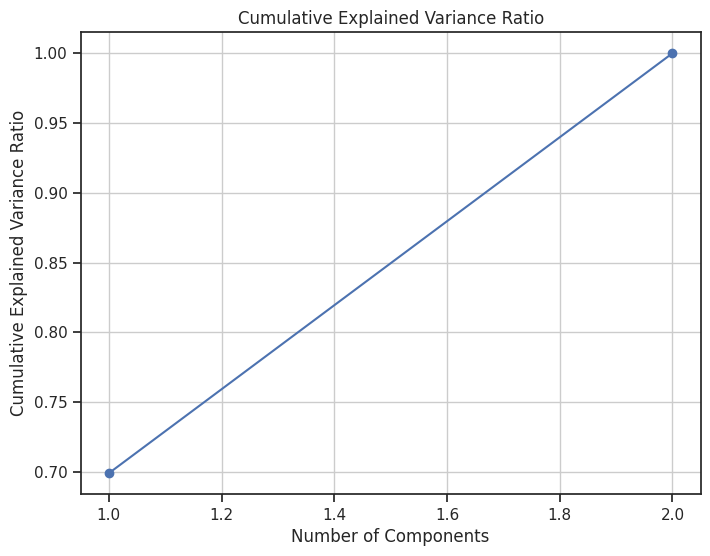

In [85]:
# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [86]:
#umap_df = pd.DataFrame(X_trans, columns = ["PC1", "PC2", "PC3"])
# Create a DataFrame for PCA results
umap_columns = [f'PC{i}' for i in range(1, num_components + 1)]
umap_df = pd.DataFrame(data=X_trans, columns=umap_columns)
umap_df

PC1       PC2
0     3.021820  5.856349
1     1.834957  2.356903
2     2.393214  6.436825
3     7.164899  4.337404
4     7.207113  6.456436
...        ...       ...
2702  4.005801  1.813497
2703  8.106911  5.326935
2704  5.318526  2.073233
2705  6.600185  4.079553
2706  6.305223  3.409276

[2707 rows x 2 columns]

/tmp/ipykernel_156798/824404214.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Accent', 10))


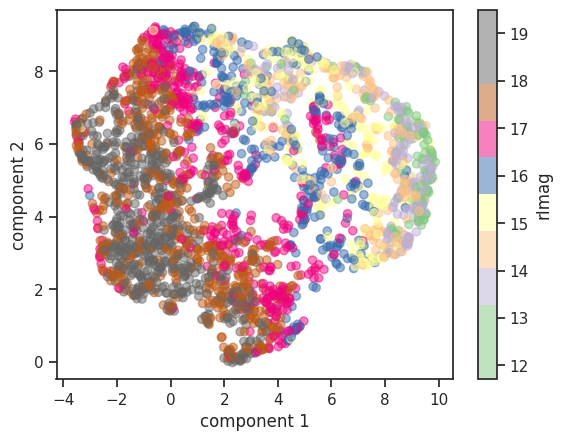

In [87]:
# Assuming umap_df is your DataFrame containing UMAP components and g_PStotal column
plt.scatter(umap_df["PC1"], umap_df["PC2"],
            c=df_filtered["rImag"],  # Set color based on the values of "g_PStotal"
            alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label='rImag')  # Set the label of the color bar to 'g_PStotal'
plt.show()

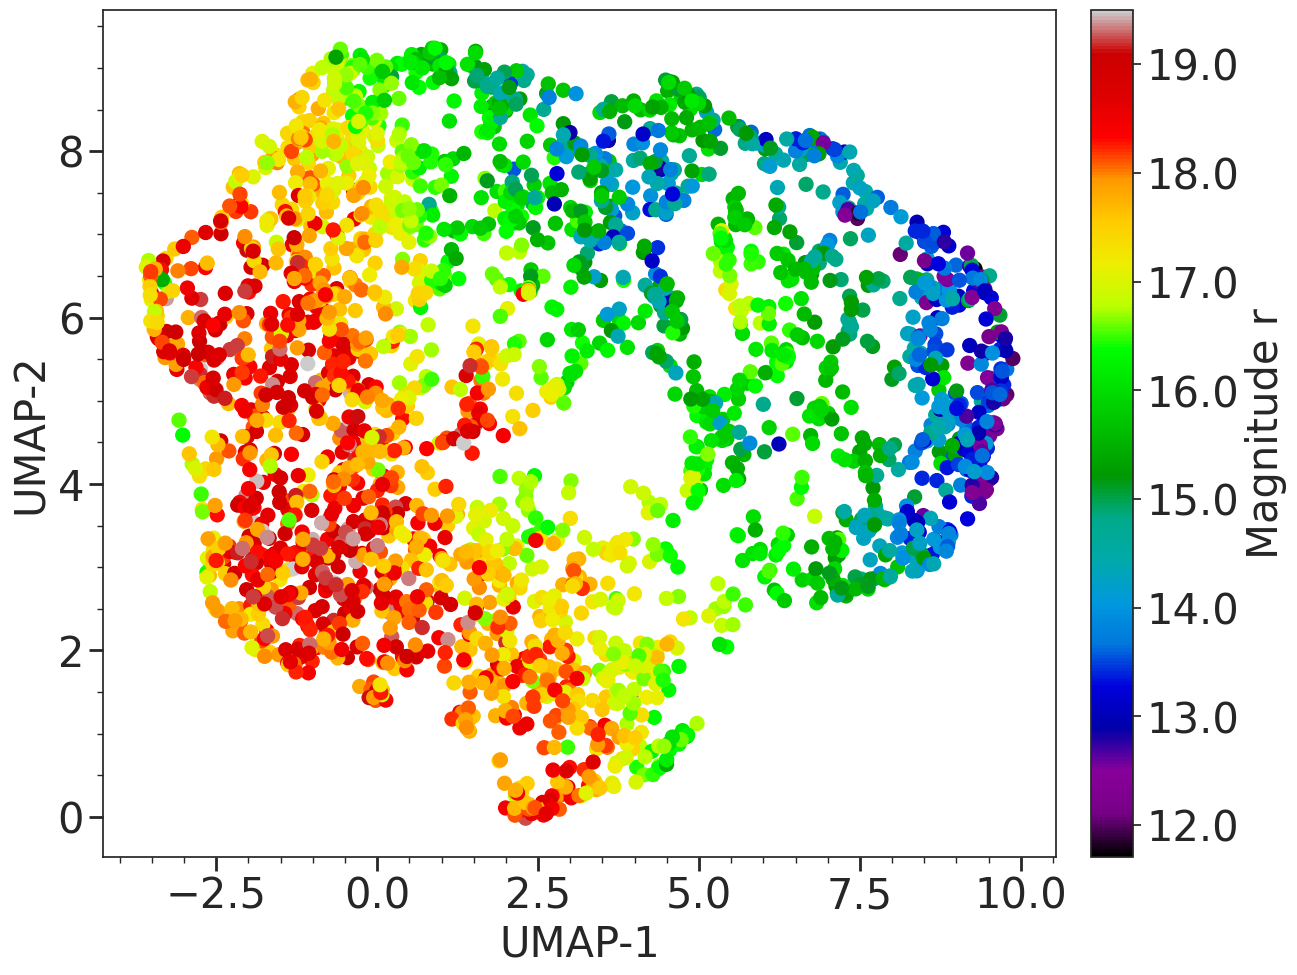

In [88]:
from matplotlib.ticker import MultipleLocator, NullFormatter

# Plotting
with sns.axes_style("ticks"):
    fig, ax = plt.subplots(figsize=(15, 11))
    plt.xlabel("UMAP-1", fontsize=30)
    plt.ylabel("UMAP-2", fontsize=30)
    plt.tick_params(axis='x', labelsize=30, width=2, length=10)  # Adjusting width of tick marks
    plt.tick_params(axis='y', labelsize=30, width=2, length=10)  # Adjusting width of tick marks

    # Create a scatter plot
    sc = ax.scatter(umap_df["PC1"], umap_df["PC2"], c=df_filtered["rImag"], cmap="nipy_spectral", s=100)
    
    # Add minor tick locators without showing the minor ticks
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_formatter(NullFormatter())
    ax.yaxis.set_minor_formatter(NullFormatter())

    # Add a colorbar with improved visibility
    cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.03, format='%.1f')
    cbar.set_label("Magnitude r", fontsize=30)  # Provide a label for the colorbar
    cbar.ax.tick_params(labelsize=30)  # Adjust the size of the tick labels

#plt.savefig("../Figs/umap_splus_wise.pdf")

## HDBSCAN 

#### Find the best parameters 

To find the best min_samples and min_cluster_size parameters for HDBSCAN, you typically perform a grid search over a range of values and evaluate the clustering performance using a metric such as silhouette score or another relevant metric.

Here's a general approach you can follow:

    Define a grid of parameters to search over for min_samples and min_cluster_size.
    For each combination of parameters:
        Fit HDBSCAN to your data.
        Evaluate the clustering performance using a metric such as silhouette score.
    Select the parameters that result in the highest clustering performance according to your chosen metric.

Here's how you can perform this grid search:

In [89]:

# Define the range of values for min_samples and min_cluster_size
min_samples_range = [5, 10, 15, 20, 25, 30, 35]  # Adjust as needed
min_cluster_size_range = [40, 50, 60, 80, 100, 120, 150]  # Adjust as needed

In [90]:
best_score = -1
best_params = {}


In [91]:
for min_samples in min_samples_range:
    for min_cluster_size in min_cluster_size_range:
        # Fit HDBSCAN with the current parameters
        clusterer_ = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = clusterer_.fit_predict(X_trans)  # X is your data
        
        # Evaluate clustering performance using silhouette score
        silhouette_ = silhouette_score(X_trans, labels)
        
        # Check if current parameters result in a better silhouette score
        if silhouette_ > best_score:
            best_score = silhouette_
            best_params['min_samples'] = min_samples
            best_params['min_cluster_size'] = min_cluster_size

In [92]:
print("Best parameters:", best_params)
print("Best silhouette score:", best_score)

Best parameters: {'min_samples': 30, 'min_cluster_size': 50}
Best silhouette score: 0.17634723


### Applying HDBSCAN 

I foun that the best configurations of parameteres are 'min_samples': 5 and 'min_cluster_size': 100. We try then: 
But first try this min_samples=15, min_cluster_size=60

In [93]:
#clusterer = hdbscan.HDBSCAN(min_samples=15, min_cluster_size=100, prediction_data=True, gen_min_span_tree=True, cluster_selection_epsilon=0.3,  # Une clusters cercanos
#    cluster_selection_method='leaf')  # Más sensible a clusters pequeños)
#clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=1, gen_min_span_tree=True)


In [94]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80,      # Detecta grupos más pequeños
    min_samples=25,            # Más sensible a densidades variables
    cluster_selection_method='eom',  # Mejor para clusters de densidad mixta
    cluster_selection_epsilon=0.5,   # Une clusters cercanos
    gen_min_span_tree=True
)

In [95]:

clusterer.fit(X_trans)
labels = clusterer.labels_

In [96]:
clusterer.metric

'euclidean'

In [99]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster0 = list(labels).count(0)
n_cluster1 = list(labels).count(1)
n_cluster2 = list(labels).count(2)
n_cluster3 = list(labels).count(3)
n_cluster4 = list(labels).count(4)
n_cluster5 = list(labels).count(5)
n_noise_ = list(labels).count(-1)


In [100]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points 0: %d' % n_cluster0)
print('Estimated number of cluster points 1: %d' % n_cluster1)
print('Estimated number of cluster points 2: %d' % n_cluster2)
print('Estimated number of cluster points 3: %d' % n_cluster3)
print('Estimated number of cluster points 4: %d' % n_cluster4)
print('Estimated number of cluster points 5: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of cluster points 0: 330
Estimated number of cluster points 1: 95
Estimated number of cluster points 2: 143
Estimated number of cluster points 3: 1363
Estimated number of cluster points 4: 0
Estimated number of cluster points 5: 0
Estimated number of noise points: 776


<Axes: >

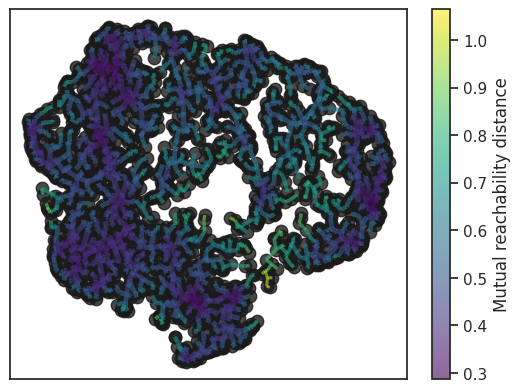

In [101]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


### Build the cluster hierarchy 

<Axes: ylabel='distance'>

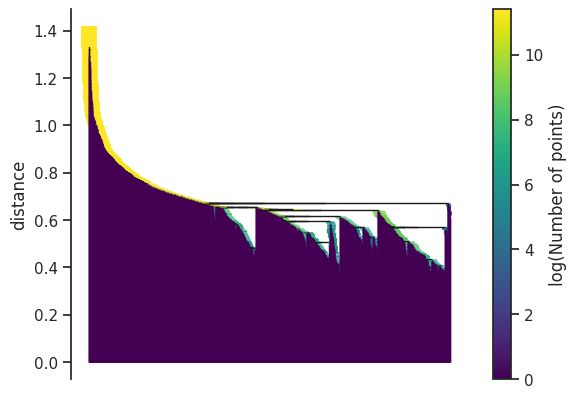

In [67]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Extract the clusters

<Axes: ylabel='$\\lambda$ value'>

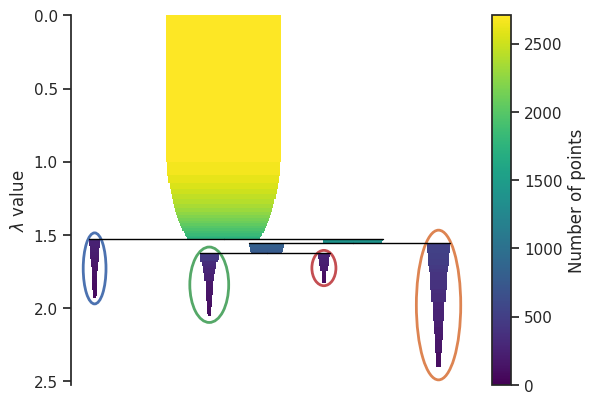

In [68]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

Plting the components

<Axes: xlabel='PC1', ylabel='PC2'>

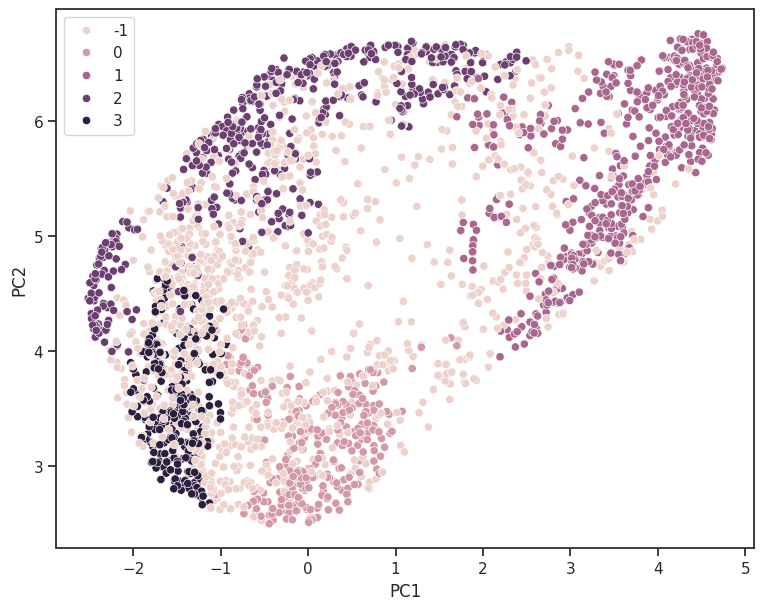

In [69]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC2"], 
                hue=labels,
                )

<Axes: xlabel='PC1', ylabel='PC3'>

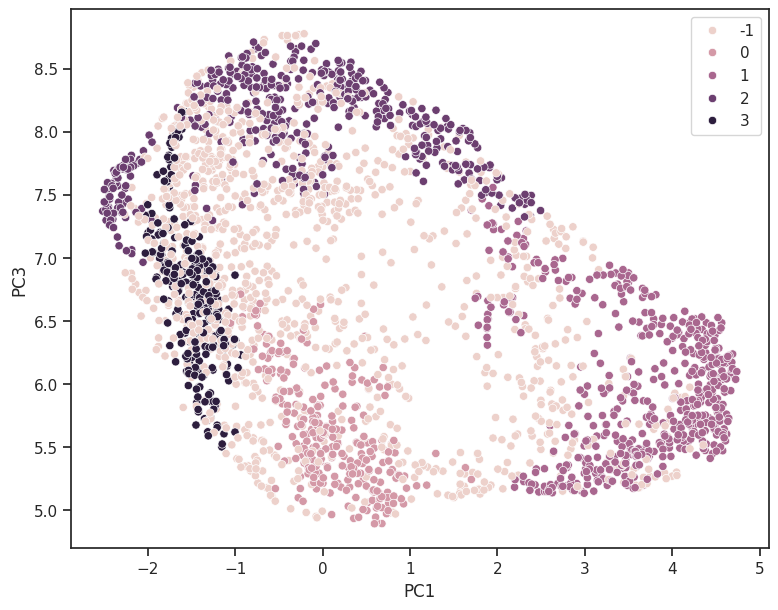

In [70]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC3"], 
                hue=labels,
                )

<Axes: xlabel='PC1', ylabel='PC4'>

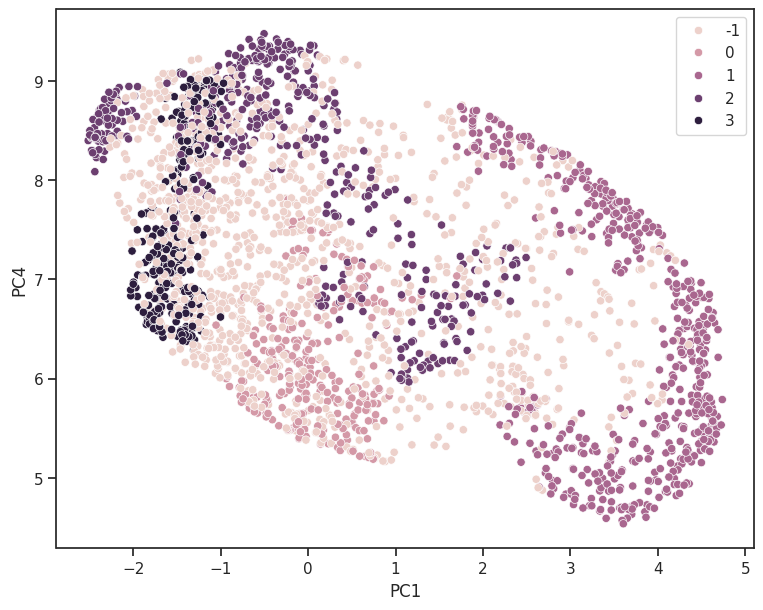

In [71]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC4"], 
                hue=labels,
                )

<Axes: xlabel='PC1', ylabel='PC5'>

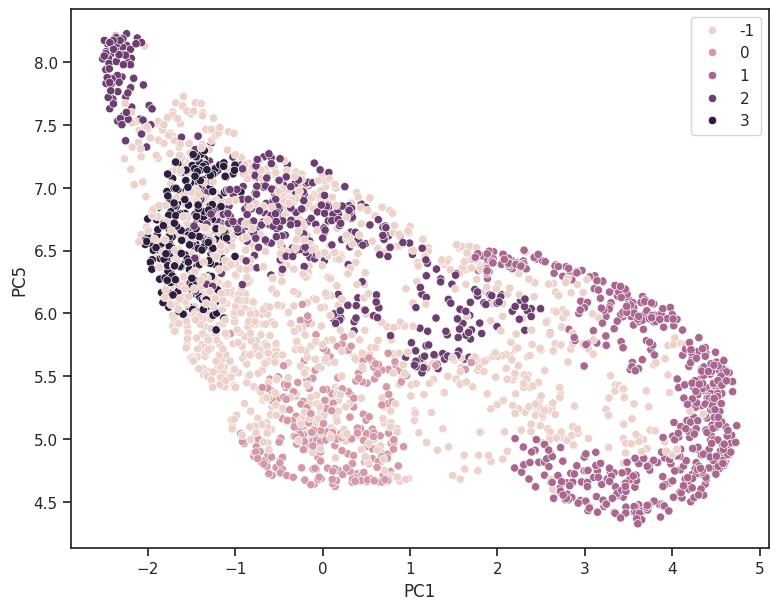

In [72]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC1"], y=umap_df["PC5"], 
                hue=labels,
                )

<Axes: xlabel='PC2', ylabel='PC3'>

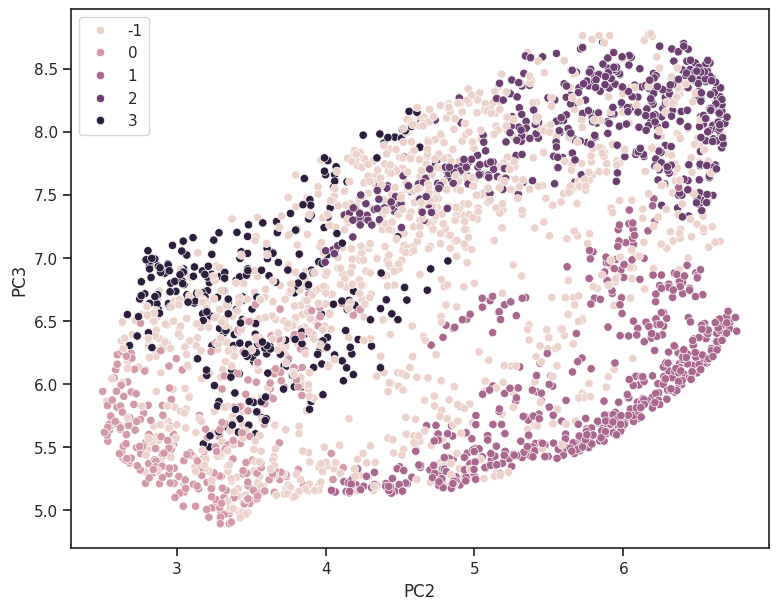

In [73]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC2"], y=umap_df["PC3"], 
                hue=labels,
                )

<Axes: xlabel='PC3', ylabel='PC4'>

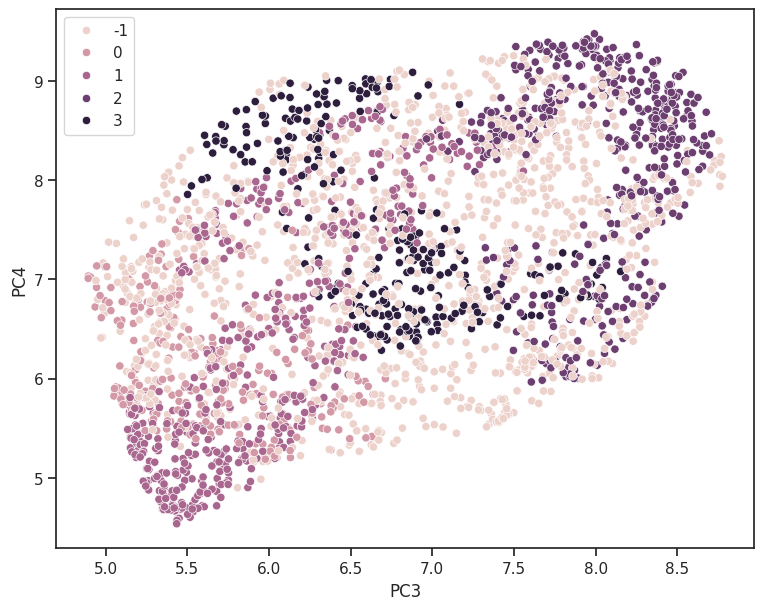

In [74]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC3"], y=umap_df["PC4"], 
                hue=labels,
                )

<Axes: xlabel='PC3', ylabel='PC5'>

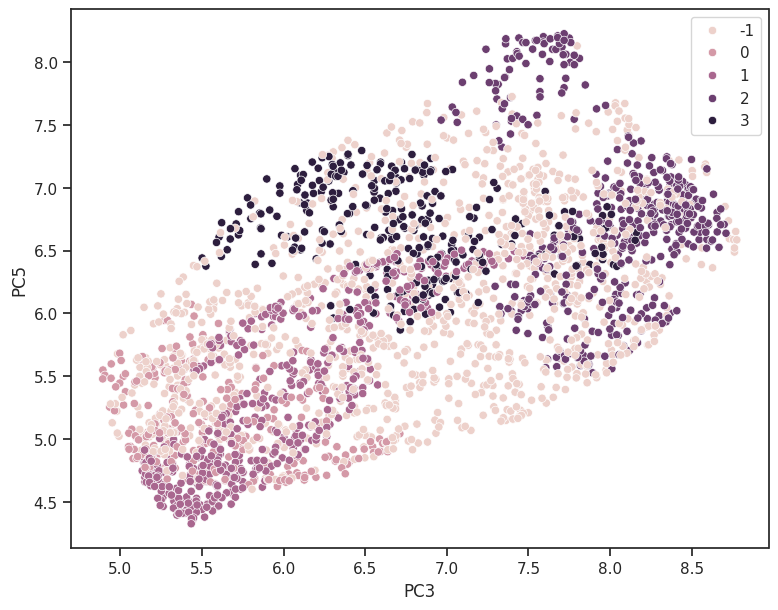

In [75]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC3"], y=umap_df["PC5"], 
                hue=labels,
                )

<Axes: xlabel='PC4', ylabel='PC5'>

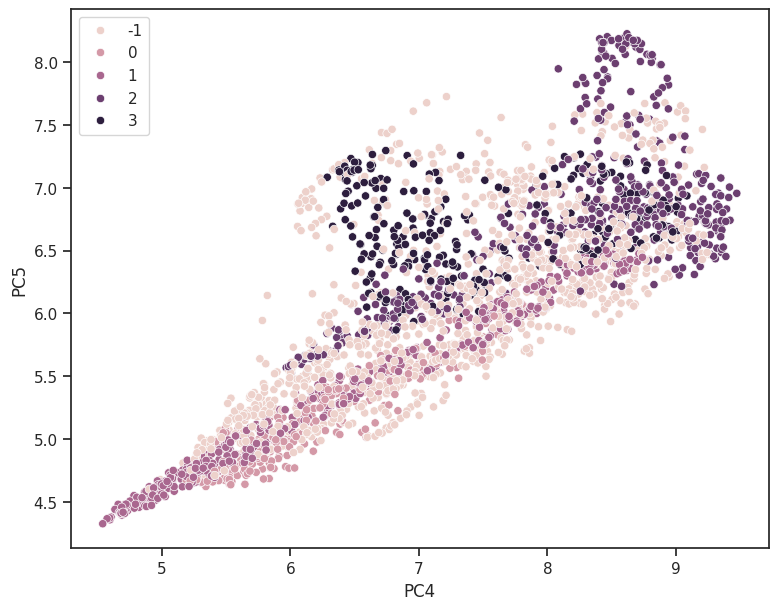

In [76]:
plt.figure(figsize=(9,7))
sns.scatterplot(x=umap_df["PC4"], y=umap_df["PC5"], 
                hue=labels,
                )

By resetting the indexes with reset_index(drop=True), you ensure that each DataFrame's index starts from 0, effectively aligning the rows properly for concatenation. Then you can concatenate them horizontally without encountering issues due to mismatched indexes.

In [77]:
# Concatenat the original claen table with the umap results
df_filtered.reset_index(drop=True, inplace=True)
umap_df.reset_index(drop=True, inplace=True)
df_cleanErr_umap = pd.concat([df_filtered, umap_df], axis=1)

Create the tables for each clase

In [78]:
df_cleanErr_umap["Label"] = labels

In [79]:
df_cleanErr_umap

Name     RAJ2000    DEJ2000       GLON      GLAT  \
0     J194751.91+311818.2  296.966304  31.305043  66.858708  2.957180   
1     J195003.04+320607.2  297.512666  32.101992  67.782537  2.958194   
2     J195655.87+315637.0  299.232804  31.943608  68.395607  1.625256   
3     J200145.75+323013.5  300.440627  32.503743  69.408688  1.049061   
4     J200008.83+322535.0  300.036799  32.426377  69.163173  1.297699   
...                   ...         ...        ...        ...       ...   
2702  J193948.01+285751.9  294.950056  28.964425  63.957040  3.308919   
2703  J194716.33+284444.4  296.818036  28.745659  64.580360  1.780277   
2704  J194657.47+291706.8  296.739465  29.285215  65.012424  2.111001   
2705  J194631.32+291451.9  296.630484  29.247751  64.932234  2.174407   
2706  J194912.66+294740.1  297.302738  29.794486  65.699773  1.944719   

             SourceID   ePos  Class  pStar  pGalaxy  ...   pmDE  e_pmDE  \
0     572370-1-13529   0.056   99.0   0.05     0.95  ...    0.0    49.0   
1     399482-2-6063    0.089   -1.0   1.00     0.00  ... -221.0    40.0   
2     406576-2-10667   0.079   99.0   0.95     0.05  ...  796.0   356.0   
3     475219-2-7987    0.043   -1.0   1.00     0.00  ... -320.0    51.0   
4     474809-4-10727   0.071   -1.0   1.00     0.00  ...  -19.0    39.0   
...               ...    ...    ...    ...      ...  ...    ...     ...   
2702  571586-2-3412    0.030   -1.0   1.00     0.00  ... -602.0   119.0   
2703  626263-1-15177   0.031   -1.0   1.00     0.00  ... -230.0    38.0   
2704  626263-3-22491   0.026   -1.0   1.00     0.00  ...  -15.0   114.0   
2705  364539-1-2795    0.031   -1.0   1.00     0.00  ...  101.0    71.0   
2706  534182-1-4440    0.018   -1.0   1.00     0.00  ...  -83.0    58.0   

        d2M   angDist       PC1       PC2       PC3       PC4       PC5  Label  
0     0.035  0.174561  0.137698  5.185329  7.238087  5.781670  5.944217     -1  
1     0.198  0.087365  0.194274  3.016046  6.440655  6.149270  5.501786     -1  
2     0.347  0.448454 -0.291548  5.791328  7.654789  6.283086  6.773442     -1  
3     0.257  0.284214  3.446187  4.702407  5.221452  6.258128  5.118637     -1  
4     0.066  0.074302  3.669301  5.449756  5.866899  7.568423  5.873217      1  
...     ...       ...       ...       ...       ...       ...       ...    ...  
2702  0.340  0.473215  0.810240  3.299789  5.053904  5.900934  4.919998      0  
2703  0.199  0.043361  4.353907  5.587091  5.516553  6.343047  5.200432     -1  
2704  0.691  0.675858  1.487344  3.892902  5.381644  5.411384  4.710977     -1  
2705  0.052  0.108804  2.915833  4.326896  5.187614  6.194201  5.079247     -1  
2706  0.323  0.274081  2.586212  4.161083  5.149018  5.810424  4.912914      1  

[2707 rows x 211 columns]

**Preliminary conlusions**\\
Wiht the parameters recomended by the Silhouette HDBSCAM fin two group, on which one corresponds to the EB. BUt using (min_samples=5, min_cluster_size=60 HDBCAM find four group one coressponds to to the EB, aother to CV and QSOS and AGN, and the other two to QSOS each one corresnp a specific redshift.

In [80]:
# Group the data based on the "Label" column
grouped_data = df_cleanErr_umap.groupby("Label")

In [81]:
# Define the directory where you want to save the CSV files
directory = '../Class_wise_allWiseFilters/'

In [82]:
# Iterate over each group
for label, group_df in grouped_data:
    if label == -1:  # Noise points
        filename = f'Halpha_emitter_wise_noise.csv'
    else:
        filename = f'Halpha_emitter_wise_group{label}.csv'
    group_df.to_csv(directory + filename, index=False)